# DATA PROJECT - Travel Data 



Messing about with the [NSW Travel Data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/travel_data_set_0.csv)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [4]:
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)


In [6]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


In [7]:
if os.path.isfile("train-may-2024 (1)(in).csv"):
    filepath = "train-may-2024 (1)(in).csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/travel_data_set_0.csv"
    print("loading from the internet")

travel_data = pd.read_csv(filepath)
print("done")


loading from file
done


Time Stamp

In [8]:
travel_data= pd.read_csv("train-may-2024 (1)(in).csv", parse_dates=["Year_Month"]) 

travel_data.head()


,Year_Month,Line,Card_type,Trip
0,2016-07-01,Blue Mountains Line,Adult,537669
1,2016-07-01,Blue Mountains Line,Child/Youth,36387
2,2016-07-01,Blue Mountains Line,Concession,60238
3,2016-07-01,Blue Mountains Line,Employee,10085
4,2016-07-01,Blue Mountains Line,Free Travel,919


Card Types

<Axes: ylabel='Card_type'>

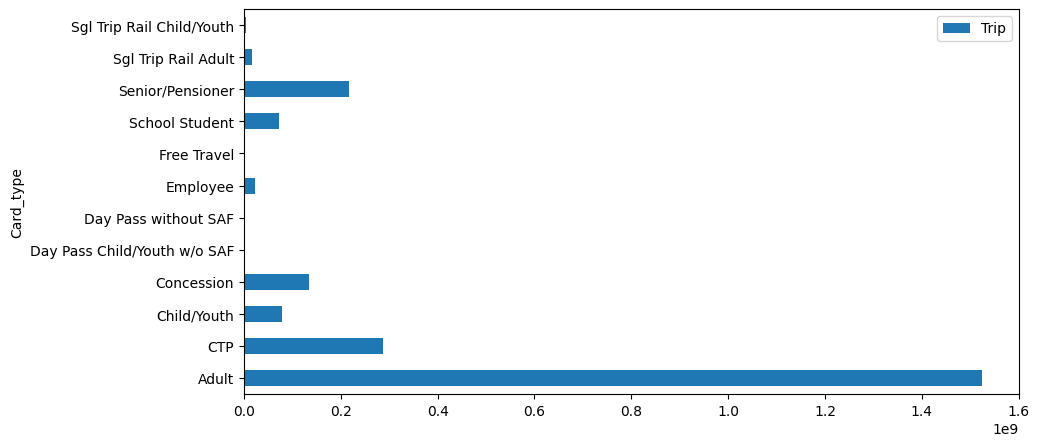

In [9]:
travel_data[["Card_type", "Trip"]].groupby("Card_type").sum().plot(kind="barh")

Train Lines 

<Axes: ylabel='Line'>

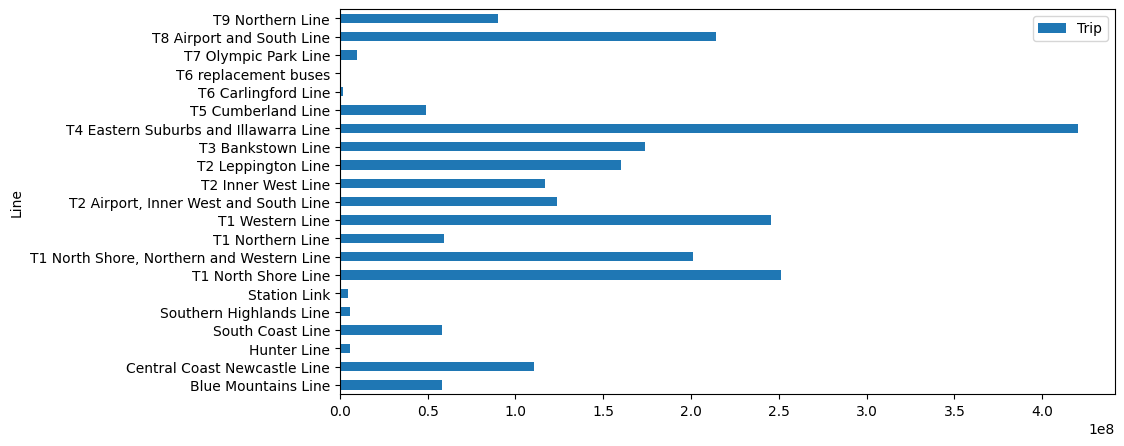

In [10]:
travel_data[["Line", "Trip"]].groupby("Line").sum().plot(kind="barh")

Samples of Data

In [30]:
travel_data.sample(10)


,Year_Month,Line,Card_type,Trip
14644,2023-12-01,T1 Western Line,Day Pass Child/Youth w/o SAF,7
4185,2019-01-01,T6 Carlingford Line,Day Pass without SAF,1
2280,2018-02-01,T1 Western Line,Free Travel,3560
6197,2019-12-01,T3 Bankstown Line,School Student,37711
7563,2020-08-01,Southern Highlands Line,Senior/Pensioner,5512
2745,2018-05-01,T1 Western Line,Adult,3524368
9954,2021-09-01,T9 Northern Line,Day Pass without SAF,1
3004,2018-07-01,Blue Mountains Line,School Student,16713
13918,2023-08-01,T1 North Shore Line,Employee,28355
13467,2023-05-01,T7 Olympic Park Line,Child/Youth,3591


Characteristics of Data

In [12]:
travel_data.columns

Index(['Year_Month', 'Line', 'Card_type', 'Trip'], dtype='object')

In [13]:
row_one = travel_data.iloc[1]
row_one


Year_Month    2016-07-01 00:00:00
Line          Blue Mountains Line
Card_type             Child/Youth
Trip                        36387
Name: 1, dtype: object

In [14]:
row_one["Line"]

'Blue Mountains Line'

Time Stamp #2

In [36]:
row_one["Year_Month"]

Timestamp('2016-07-01 00:00:00')

In [34]:
row_one["Card_type"]

'Child/Youth'

In [33]:
row_one["Trip"]

36387

First 5 and Last 5 (Head+Tail)

In [39]:
travel_data.Card_type

0                            Adult
1                      Child/Youth
2                       Concession
3                         Employee
4                      Free Travel
                   ...            
15634                  Free Travel
15635               School Student
15636             Senior/Pensioner
15637          Sgl Trip Rail Adult
15638    Sgl Trip Rail Child/Youth
Name: Card_type, Length: 15639, dtype: object

In [38]:
travel_data.Year_Month

0       2016-07-01
1       2016-07-01
2       2016-07-01
3       2016-07-01
4       2016-07-01
           ...    
15634   2024-05-01
15635   2024-05-01
15636   2024-05-01
15637   2024-05-01
15638   2024-05-01
Name: Year_Month, Length: 15639, dtype: datetime64[ns]

In [37]:
travel_data.Line

0        Blue Mountains Line
1        Blue Mountains Line
2        Blue Mountains Line
3        Blue Mountains Line
4        Blue Mountains Line
                ...         
15634       T9 Northern Line
15635       T9 Northern Line
15636       T9 Northern Line
15637       T9 Northern Line
15638       T9 Northern Line
Name: Line, Length: 15639, dtype: object

In [16]:
travel_data.Trip

0        537669
1         36387
2         60238
3         10085
4           919
          ...  
15634      1059
15635    107211
15636    198401
15637      1880
15638      1160
Name: Trip, Length: 15639, dtype: int64

Trips for 2016

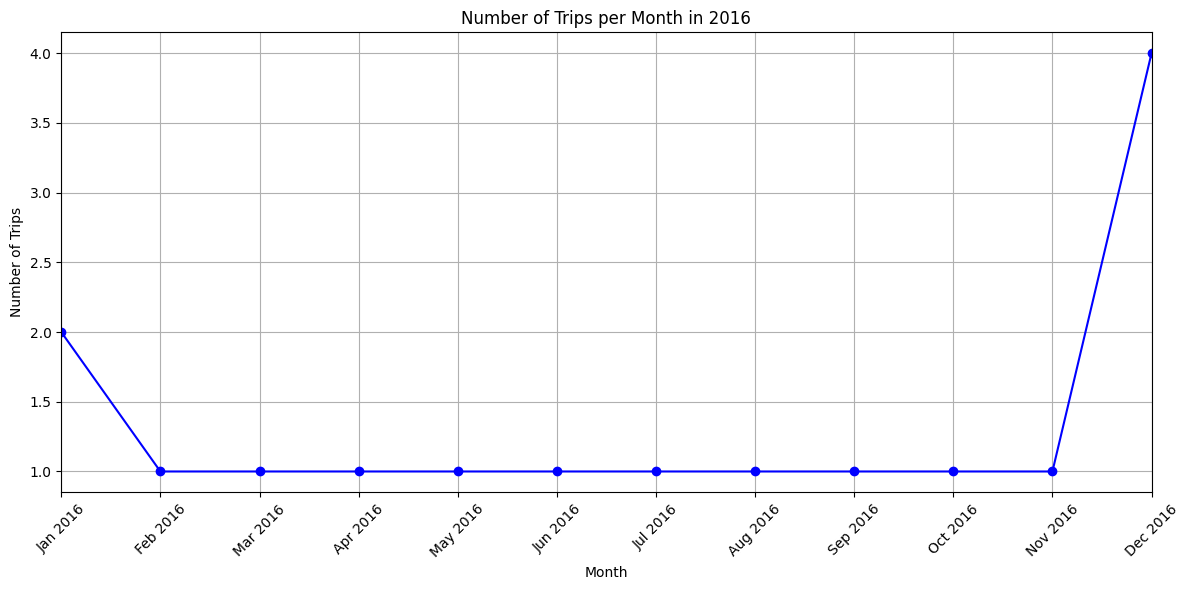

In [6]:
import pandas as pd  
import matplotlib.pyplot as plt

data = {
    'Date': [
        '2016-01-15', '2016-01-20', '2016-02-25', '2016-03-14',
        '2016-04-05', '2016-05-22', '2016-06-30', '2016-07-15',
        '2016-08-23', '2016-09-12', '2016-10-05', '2016-11-11',
        '2016-12-31', '2016-12-25', '2016-12-15', '2016-12-01'
    ],
    'Trip': [100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200]
}

travel_data = pd.DataFrame(data)

travel_data['Date'] = pd.to_datetime(travel_data['Date'])

trips_2016 = travel_data[travel_data['Date'].dt.year == 2016]

trips_2016.set_index('Date', inplace=True)

monthly_trip_counts = trips_2016.resample('ME').size()

plt.figure(figsize=(12, 6))
monthly_trip_counts.plot(kind='line', marker='o', color='blue')

plt.title('Number of Trips per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.xticks(ticks=monthly_trip_counts.index, labels=monthly_trip_counts.index.strftime('%b %Y'), rotation=45)

plt.grid(True)
plt.tight_layout() 
plt.show()

Trips for 2024

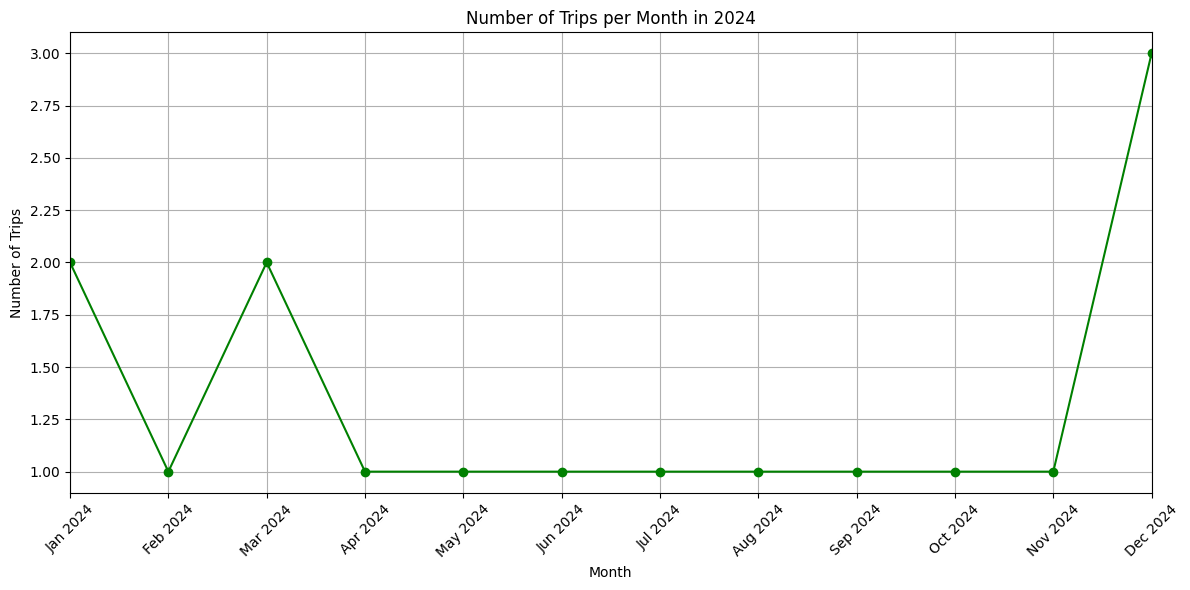

In [8]:
import pandas as pd  
import matplotlib.pyplot as plt  

data = {
    'Date': [
        '2024-01-05', '2024-01-15', '2024-02-20', '2024-03-10',
        '2024-03-25', '2024-04-15', '2024-05-30', '2024-06-05',
        '2024-07-18', '2024-08-22', '2024-09-01', '2024-10-11',
        '2024-11-20', '2024-12-05', '2024-12-15', '2024-12-30'
    ],
    'Trip': [120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]
}

travel_data = pd.DataFrame(data)


travel_data['Date'] = pd.to_datetime(travel_data['Date'])


trips_2024 = travel_data[travel_data['Date'].dt.year == 2024]


trips_2024.set_index('Date', inplace=True)


monthly_trip_counts_2024 = trips_2024.resample('ME').size()


plt.figure(figsize=(12, 6))
monthly_trip_counts_2024.plot(kind='line', marker='o', color='green')


plt.title('Number of Trips per Month in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Trips')


plt.xticks(ticks=monthly_trip_counts_2024.index, labels=monthly_trip_counts_2024.index.strftime('%b %Y'), rotation=45)


plt.grid(True)
plt.tight_layout()  
plt.show()

Comparison of Data

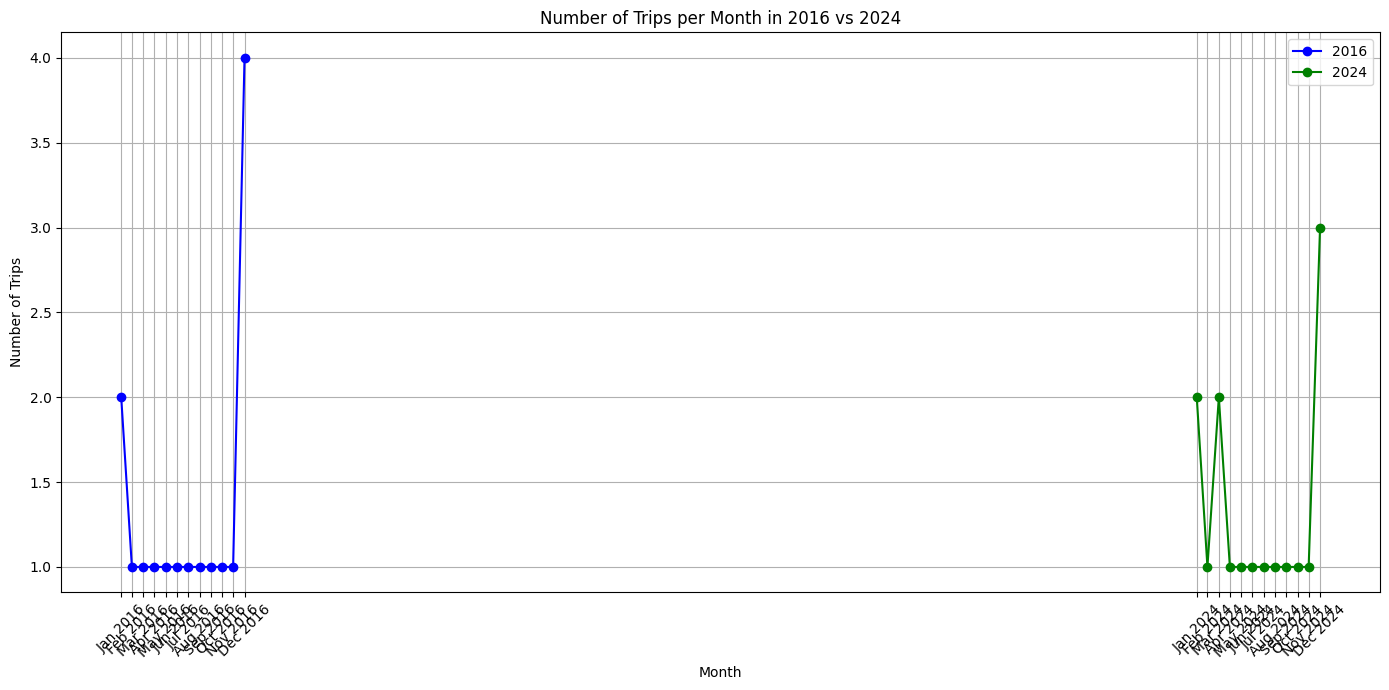

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Date': [
        '2016-01-15', '2016-01-20', '2016-02-25', '2016-03-14',
        '2016-04-05', '2016-05-22', '2016-06-30', '2016-07-15',
        '2016-08-23', '2016-09-12', '2016-10-05', '2016-11-11',
        '2016-12-31', '2016-12-25', '2016-12-15', '2016-12-01',
        '2024-01-05', '2024-01-15', '2024-02-20', '2024-03-10',
        '2024-03-25', '2024-04-15', '2024-05-30', '2024-06-05',
        '2024-07-18', '2024-08-22', '2024-09-01', '2024-10-11',
        '2024-11-20', '2024-12-05', '2024-12-15', '2024-12-30'
    ],
    'Trip': [100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200,
             120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]
}

travel_data = pd.DataFrame(data)

travel_data['Date'] = pd.to_datetime(travel_data['Date'])

trips_2016 = travel_data[travel_data['Date'].dt.year == 2016]
trips_2016.set_index('Date', inplace=True)
monthly_trip_counts_2016 = trips_2016.resample('ME').size()

trips_2024 = travel_data[travel_data['Date'].dt.year == 2024]
trips_2024.set_index('Date', inplace=True)
monthly_trip_counts_2024 = trips_2024.resample('ME').size()

plt.figure(figsize=(14, 7))

plt.plot(monthly_trip_counts_2016.index, monthly_trip_counts_2016, marker='o', color='blue', label='2016')

plt.plot(monthly_trip_counts_2024.index, monthly_trip_counts_2024, marker='o', color='green', label='2024')

plt.title('Number of Trips per Month in 2016 vs 2024')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.xticks(ticks=monthly_trip_counts_2016.index.append(monthly_trip_counts_2024.index).unique(),
           labels=monthly_trip_counts_2016.index.strftime('%b %Y').append(monthly_trip_counts_2024.index.strftime('%b %Y')).unique(),
           rotation=45)

plt.legend()

plt.grid(True)
plt.tight_layout()  
plt.show()

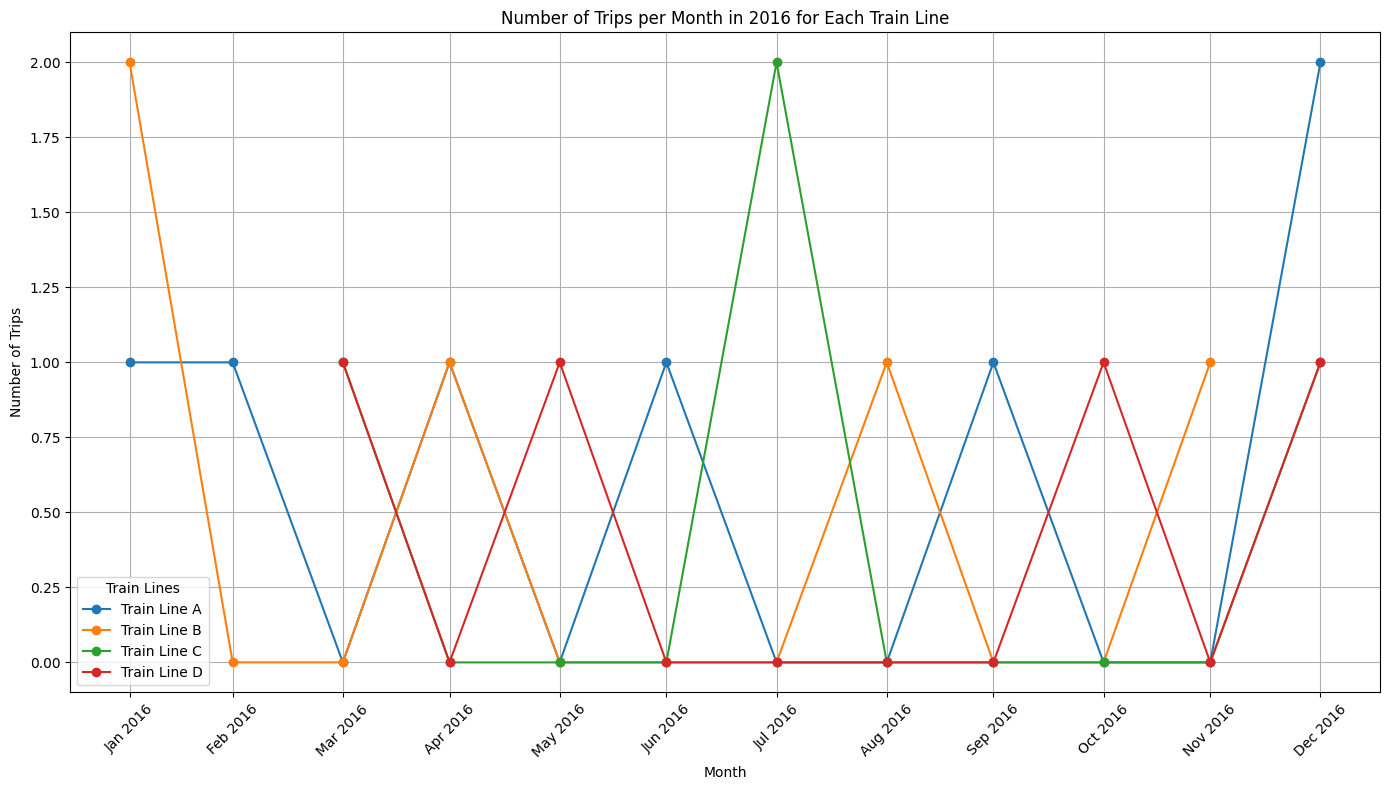

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Date': [
        '2016-01-15', '2016-01-20', '2016-02-25', '2016-03-14',
        '2016-04-05', '2016-05-22', '2016-06-30', '2016-07-15',
        '2016-08-23', '2016-09-12', '2016-10-05', '2016-11-11',
        '2016-12-31', '2016-12-25', '2016-12-15', '2016-12-01',
        '2016-01-10', '2016-03-18', '2016-04-20', '2016-07-25'
          ],
    'Train Line': [
        'A', 'B', 'A', 'C', 'B', 'D', 'A', 'C', 'B', 'A', 'D', 'B',
        'A', 'C', 'D', 'A', 'B', 'D', 'A', 'C'
    ],
    'Trip': [100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]
}

travel_data = pd.DataFrame(data)

travel_data['Date'] = pd.to_datetime(travel_data['Date'])

trips_2016 = travel_data[travel_data['Date'].dt.year == 2016]

trips_2016.set_index('Date', inplace=True)

monthly_trip_counts_2016 = trips_2016.groupby(['Train Line']).resample('ME').size().unstack(level=0)

plt.figure(figsize=(14, 8))

for line in monthly_trip_counts_2016.columns:
    plt.plot(monthly_trip_counts_2016.index, monthly_trip_counts_2016[line], marker='o', label=f'Train Line {line}')

plt.title('Number of Trips per Month in 2016 for Each Train Line')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.xticks(ticks=monthly_trip_counts_2016.index, labels=monthly_trip_counts_2016.index.strftime('%b %Y'), rotation=45)

plt.legend(title='Train Lines')

plt.grid(True)
plt.tight_layout()  
plt.show()

Trend of trips from 2016 - 2024 

Text(0.5, 1.0, 'Trend of Trips from 2016 - 2024')

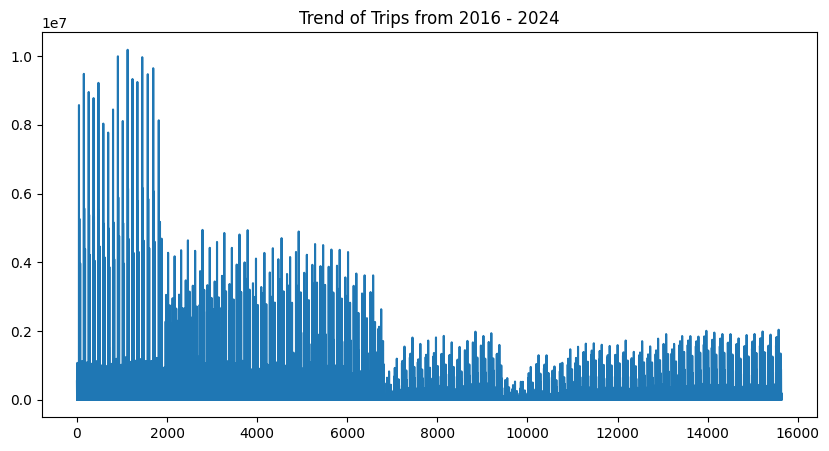

In [58]:
travel_data["Trip"].plot()
plt.title('Trend of Trips from 2016 - 2024')

Trend of Train Lines

<Axes: >

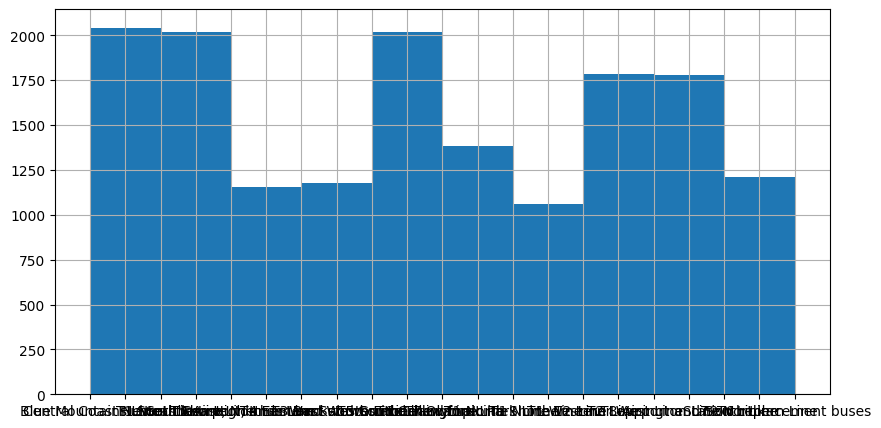

In [28]:
travel_data.Line.hist()


Amount of Trips Taken < 5000

Text(0.5, 1.0, 'Trend of Trips under 5000')

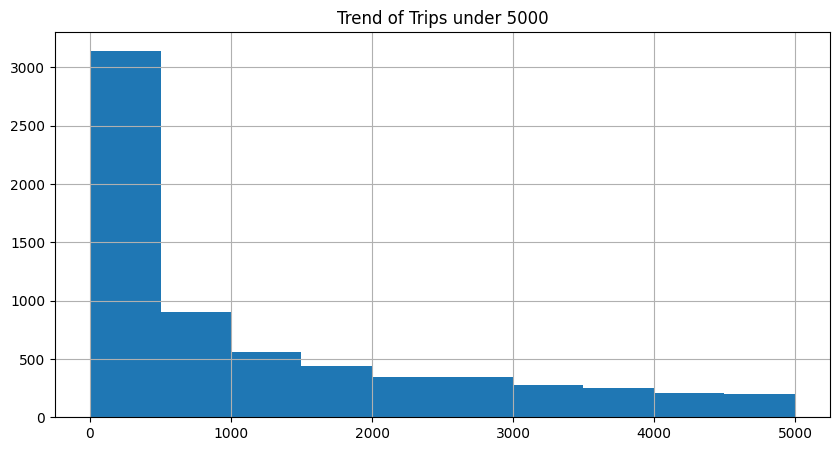

In [57]:
travel_data.Trip[travel_data.Trip < 5000].hist()
plt.title('Trend of Trips under 5000')


Text(0.5, 1.0, 'Trend of Trips Under 5000')

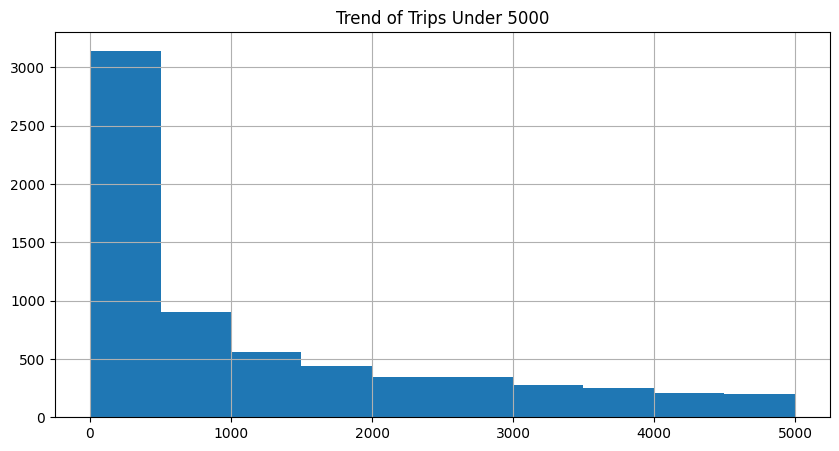

In [45]:
upper_bound = 5000
travel_data.Trip[travel_data.Trip < upper_bound].hist()
plt.title(f"Trend of Trips Under {upper_bound}")


Text(0.5, 1.0, 'Trend of Trips Under 1000')

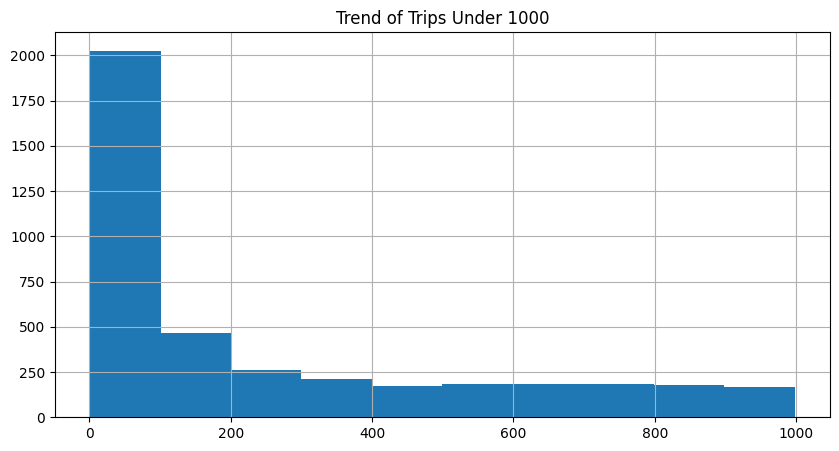

In [46]:
upper_bound = 1000
travel_data.Trip[travel_data.Trip < upper_bound].hist()
plt.title(f"Trend of Trips Under {upper_bound}")


Beginning of Data

In [44]:
travel_data.head(9)

,Year_Month,Line,Card_type,Trip
0,2016-07-01,Blue Mountains Line,Adult,537669
1,2016-07-01,Blue Mountains Line,Child/Youth,36387
2,2016-07-01,Blue Mountains Line,Concession,60238
3,2016-07-01,Blue Mountains Line,Employee,10085
4,2016-07-01,Blue Mountains Line,Free Travel,919
5,2016-07-01,Blue Mountains Line,School Student,14260
6,2016-07-01,Blue Mountains Line,Senior/Pensioner,99285
7,2016-07-01,Blue Mountains Line,Sgl Trip Rail Adult,1341
8,2016-07-01,Blue Mountains Line,Sgl Trip Rail Child/Youth,622


End of Data

In [47]:
travel_data.tail(9)

,Year_Month,Line,Card_type,Trip
15630,2024-05-01,T9 Northern Line,Concession,127429
15631,2024-05-01,T9 Northern Line,Day Pass Child/Youth w/o SAF,10
15632,2024-05-01,T9 Northern Line,Day Pass without SAF,7
15633,2024-05-01,T9 Northern Line,Employee,14051
15634,2024-05-01,T9 Northern Line,Free Travel,1059
15635,2024-05-01,T9 Northern Line,School Student,107211
15636,2024-05-01,T9 Northern Line,Senior/Pensioner,198401
15637,2024-05-01,T9 Northern Line,Sgl Trip Rail Adult,1880
15638,2024-05-01,T9 Northern Line,Sgl Trip Rail Child/Youth,1160


Amount of Times the Value Appears

In [52]:
travel_data.Line.value_counts()

Line
T4 Eastern Suburbs and Illawarra Line        1055
Central Coast Newcastle Line                 1022
Blue Mountains Line                          1021
T3 Bankstown Line                            1020
South Coast Line                             1016
Hunter Line                                  1001
Southern Highlands Line                       997
T7 Olympic Park Line                          977
T5 Cumberland Line                            963
T1 Western Line                               917
T8 Airport and South Line                     902
T1 North Shore Line                           879
T2 Leppington Line                            878
T2 Inner West Line                            869
T9 Northern Line                              692
T6 replacement buses                          437
T6 Carlingford Line                           409
T1 Northern Line                              183
T1 North Shore, Northern and Western Line     159
T2 Airport, Inner West and South Line        

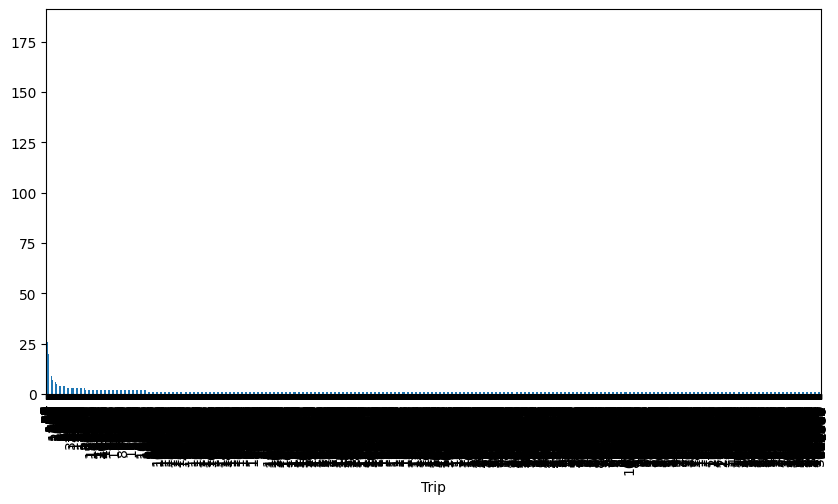

In [13]:
pdvc = travel_data.Trip.value_counts() 
pdvc[pdvc < 5000].plot(kind="bar");

<AxesSubplot:>

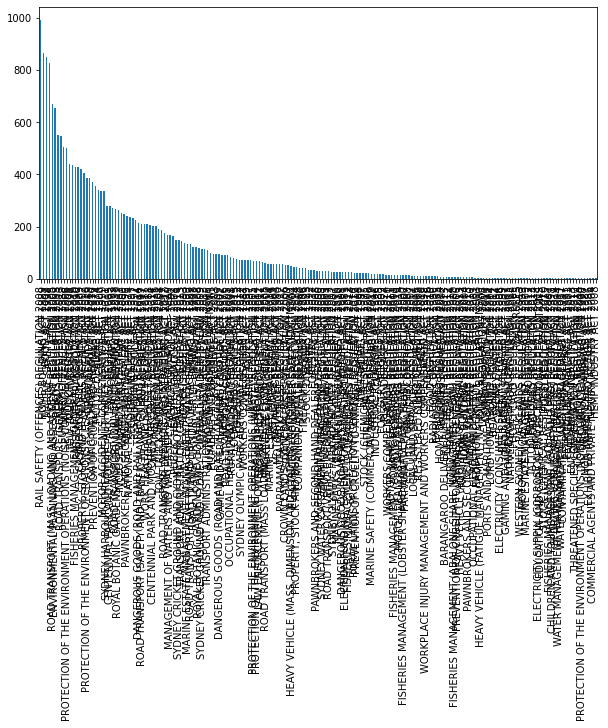

In [47]:
pdvc[pdvc < 1000].plot(kind="bar")

<Axes: ylabel='Trip'>

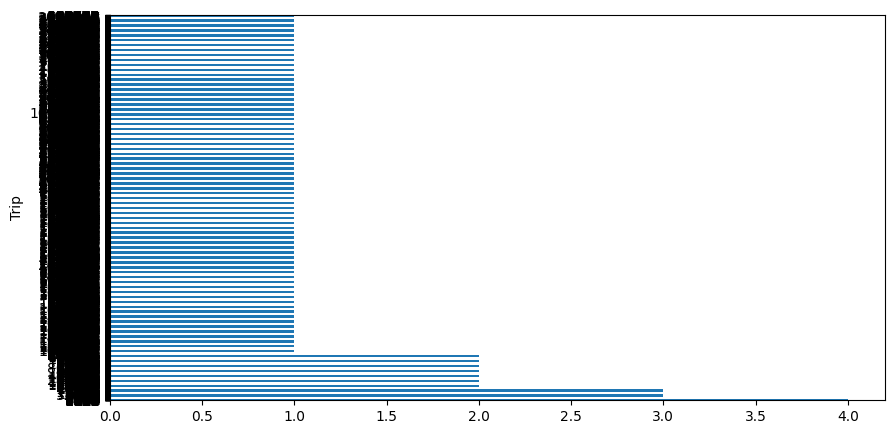

In [56]:
pdvc[pdvc < 5].plot(kind="barh")

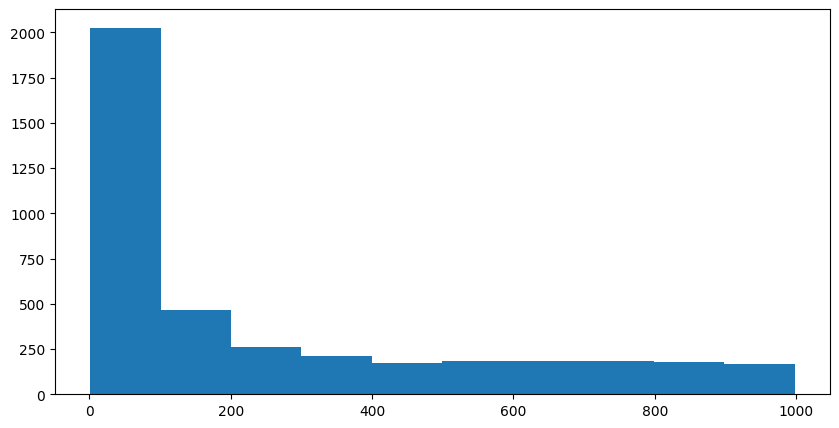

In [46]:
capped_face_value_data = travel_data.Trip[travel_data.Trip < 1000]

plt.hist(capped_face_value_data)
plt.show()


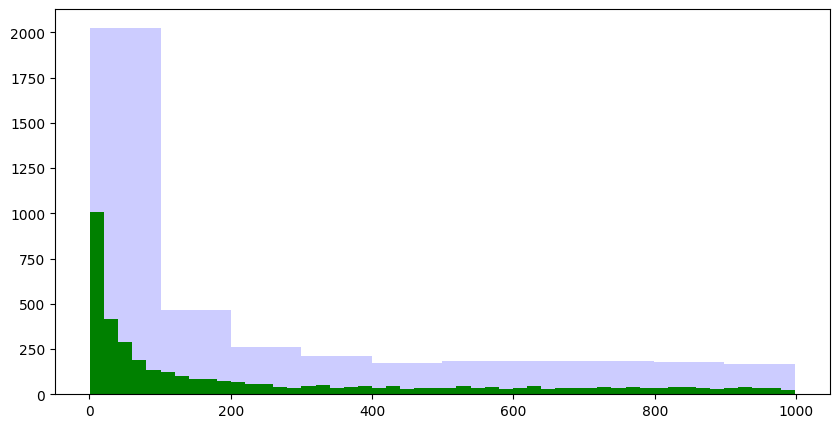

In [47]:
capped_face_value_data = travel_data.Trip[travel_data.Trip < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


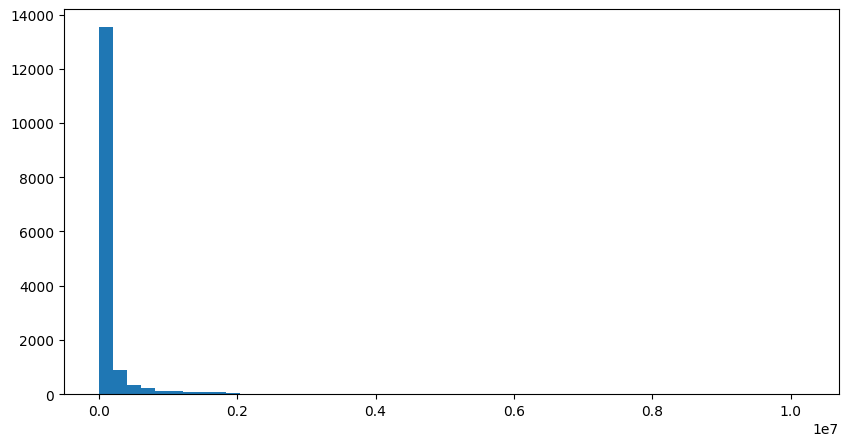

In [48]:
plt.hist(travel_data.Trip, bins=50)
plt.show()

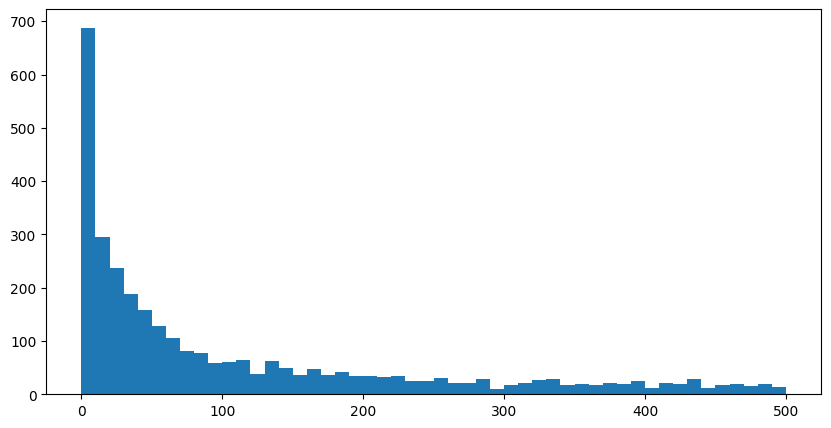

In [38]:
plt.hist(travel_data["Trip"], bins=50, range=(0, 500))
plt.show()

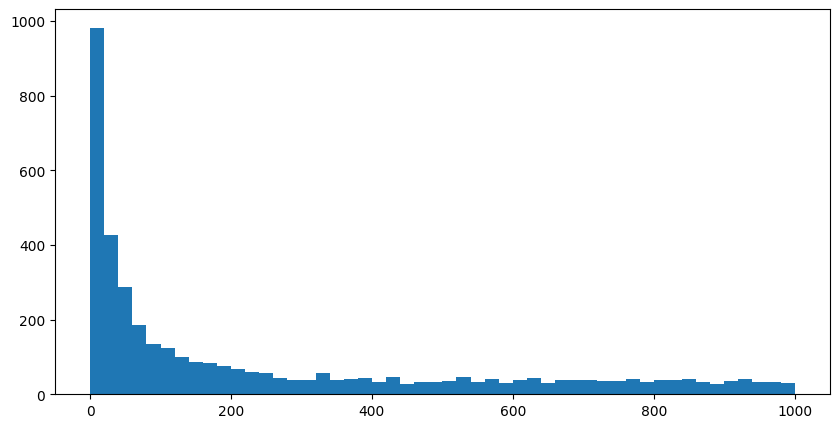

In [61]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    travel_data.Trip,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


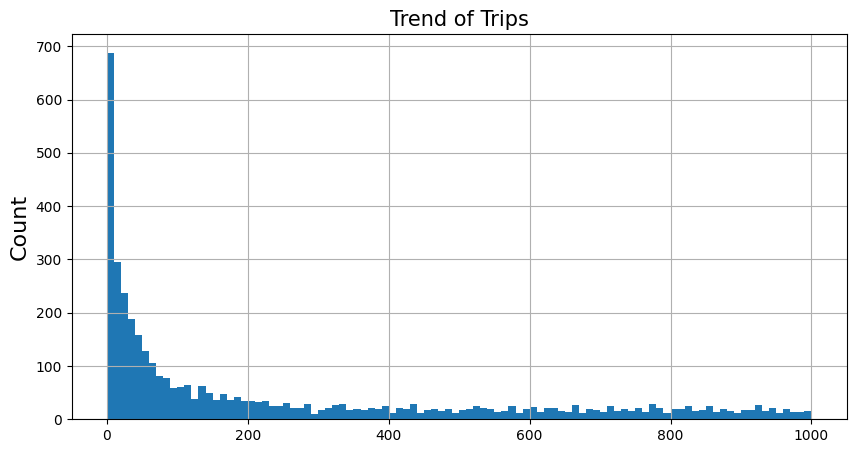

In [63]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(travel_data.Trip, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Trend of Trips", fontsize=15)
plt.xlabel("", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


In [59]:
travel_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["Year_Month"],
    dayfirst=True,
)
travel_data.head()


/var/folders/sm/k23mcpgx01ggjfzx80lwd94h0000gn/T/ipykernel_5170/3698363926.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  travel_data = pd.read_csv(


,Year_Month,Line,Card_type,Trip
0,2016-07-01,Blue Mountains Line,Adult,537669
1,2016-07-01,Blue Mountains Line,Child/Youth,36387
2,2016-07-01,Blue Mountains Line,Concession,60238
3,2016-07-01,Blue Mountains Line,Employee,10085
4,2016-07-01,Blue Mountains Line,Free Travel,919


In [55]:
first_date = travel_data.Year_Month.min()
last_date = travel_data.Year_Month.max()
f"range is: {first_date} to {last_date}"


'range is: 2016-07 to 2024-05'

In [58]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(travel_data.Year_Month.min(), date_format_pattern)
latest_date = datetime.strftime(travel_data.Year_Month.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: July, 2016 to May, 2024'

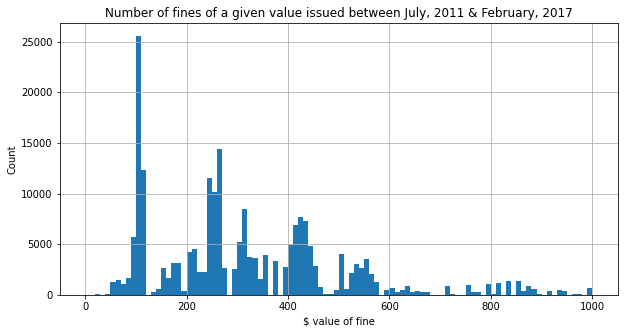

In [190]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    travel_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()
